In [1]:
!pip install gluonts

# standard imports
import numpy as np
import pandas as pd

# json
import json

# gluon data
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

# gluon imports
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

# model imports
# from gluonts.model.deepstate import DeepStateEstimator
# from gluonts.model.deep_factor import DeepFactorEstimator
from gluonts.model.deepar import DeepAREstimator

import mxnet as mx
from pprint import pprint
import random
import matplotlib.pyplot as plt




    100% |████████████████████████████████| 296kB 13.0MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/86/12/08b092f6fc9e4c2552e37add0861d0e0e0d743f78f1318973caad970b3fc/pandas-0.25.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e1/c1/bc1dba38b48f4ae3c4428aea669c5e27bd5a7642a74c8348451e0bd8ff86/tqdm-4.36.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/58/f4/bc147a1ba7175f9890523ff8f1a928a43ac8a79d5897a067158cac4d092f/mxnet-1.4.1-py2.py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0a/bc/fe7d98f0b4b1e72d0c444f343a798461c1f9d8656fb1c335416dbb8b7976/pydantic-0.28-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e1/d2/6f02df2616fd4016075f60157c7a0452b38d8f7938ae94343911e0fb0b09/dataclasses-0.7-py3-none-any.whl
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled panda

INFO:root:Using CPU


In [44]:
dataset = get_dataset("m4_yearly")

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly.


Series No.: 3065


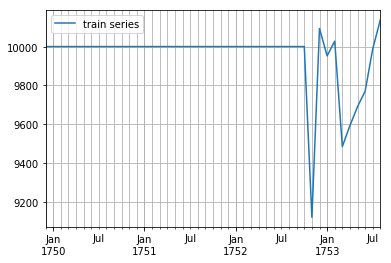

In [45]:
rn = random.randint(0, len(dataset.train))
print("Series No.:", rn)
train_series = to_pandas(list(dataset.train)[rn])
test_series = to_pandas(list(dataset.test)[rn])

# plot
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()


In [46]:
train_iter = iter(dataset.train)
test_iter = iter(dataset.test)
next(test_iter)

{'start': Timestamp('1749-12-31 00:00:00', freq='M'),
 'target': array([5172.1, 5133.5, 5186.9, 5084.6, 5182. , 5414.3, 5576.2, 5752.9,
        5955.2, 6087.8, 6238.9, 6317.2, 6262.7, 6361. , 6427.4, 6654.9,
        6835.4, 6925.5, 7073.5, 7144. , 7230.6, 7349.6, 7339.2, 7250.8,
        7294.6, 7393.9, 7560.9, 7651.4, 7587.3, 7530.5, 7261.1, 7290.2,
        7392.6, 7527.6, 7594.8, 7720.7, 7823.2], dtype=float32),
 'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source=Span(path=PosixPath('/home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly/test/data.json'), line=1), row=1)}

In [48]:
# iterate through dataset (only first ten observations)
for series in train_iter:
    if series["feat_static_cat"][0] < 10:
        print(series["start"])

1749-12-31 00:00:00
1749-12-31 00:00:00
1749-12-31 00:00:00
1749-12-31 00:00:00
1749-12-31 00:00:00
1749-12-31 00:00:00
1749-12-31 00:00:00
1749-12-31 00:00:00
1749-12-31 00:00:00


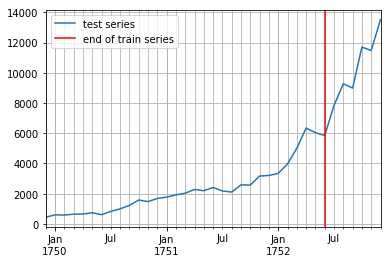

In [37]:
test_series.plot()
plt.axvline(train_series.index[-1], color='r') # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()

In [62]:
mx.random.seed(42)
mx.random.seed(42)

trainer = Trainer(ctx=mx.cpu(0),
                  epochs=100,
                  num_batches_per_epoch=50)


estimator = DeepAREstimator(trainer=trainer,
                            prediction_length=dataset.metadata.prediction_length,
                            freq="12M")

In [63]:
predictor=estimator.train(dataset.train)

INFO:root:Start model training
INFO:root:Number of parameters in DeepARTrainingNetwork: 13463
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 34.12it/s, avg_epoch_loss=8.49]
INFO:root:Epoch[0] Elapsed time 1.472 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.485938
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.48it/s, avg_epoch_loss=8.01]
INFO:root:Epoch[1] Elapsed time 1.245 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=8.010544
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 43.76it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[2] Elapsed time 1.146 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.231092
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 42.28it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[3] Elapsed time 1.187 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.479453
INFO:root:Epoch[4] Learning rate is 0.001


In [64]:
forecast_it, ts_it = make_evaluation_predictions(dataset.test,
                                                 predictor=predictor,
                                                 num_eval_samples=100)

forecasts = list(forecast_it)
tss = list(ts_it)

In [71]:
ts_entry = tss[0]
forecast_entry = forecasts[0]

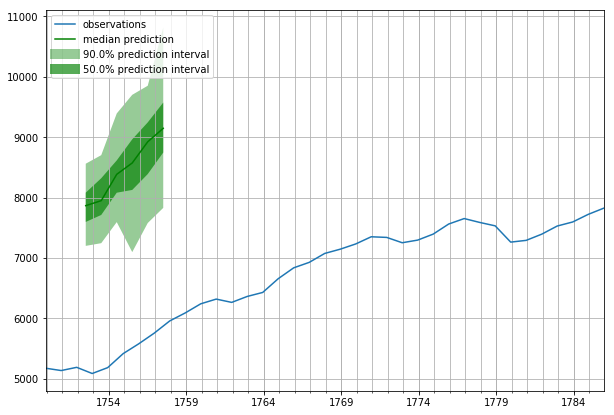

In [75]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150 
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()
    
    
plot_prob_forecasts(ts_entry, forecast_entry)

In [77]:
ts_entry

,0
1749-12-31,5172.100098
1750-12-31,5133.500000
1751-12-31,5186.899902
1752-12-31,5084.600098
1753-12-31,5182.000000
1754-12-31,5414.299805
1755-12-31,5576.200195
1756-12-31,5752.899902
1757-12-31,5955.200195
1758-12-31,6087.799805


In [78]:
forecast_entry

SampleForecast(array([[ 7865.117 ,  7844.8823,  7795.2583,  9201.535 ,  8195.621 ,
         9012.555 ],
       [ 7513.7363,  8005.931 ,  8178.206 ,  8474.731 ,  8728.623 ,
         9660.029 ],
       [ 7964.619 ,  7891.072 ,  7889.4717,  7606.099 ,  8959.992 ,
         8626.028 ],
       [ 7654.3154,  8418.463 ,  8508.656 ,  8579.47  ,  9031.5   ,
         8737.11  ],
       [ 7806.2856,  8211.1875,  8777.716 ,  9668.96  ,  9598.116 ,
         9138.213 ],
       [ 7840.8564,  8485.379 ,  8588.796 ,  9873.154 ,  9296.836 ,
         9800.925 ],
       [ 7643.0576,  8319.879 ,  8244.538 ,  8123.348 ,  8587.99  ,
         8028.3364],
       [ 7719.955 ,  8585.402 ,  8677.058 ,  9801.499 ,  9573.365 ,
         9147.466 ],
       [ 7675.461 ,  7836.59  ,  8580.2295,  8866.51  ,  5693.2427,
         7313.97  ],
       [ 7799.684 ,  8004.098 ,  8593.631 ,  8686.731 ,  8376.214 ,
         7854.939 ],
       [ 8644.11  ,  8678.308 ,  9464.971 ,  9233.19  ,  9292.081 ,
         8939.839 ],
      

Notes: 

- freq of built-in data for `m4_yearly` is `M` and therefore wrong
- create own, custom dataset???